## Gradient descent

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Define a function returning $z = f(x, y)$ and a function returning its gradient $\left(\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}\right)$.
In particular, use $z = f(x, y) = -\left(\cos^2 x + \cos^2 y \right)^2$.

In [21]:
def f(x, y): # Define function z = f(x, y).
    z = -(np.cos(x)**2 + np.cos(y)**2)**2
    return z

def gradient_f(x, y): # Define function grad(z) = (df_dx, df_dy).
    df_dx = -2 * (np.cos(x)**2 + np.cos(y)**2) * (2 * np.cos(x) * (-np.sin(x)))
    df_dy = -2 * (np.cos(x)**2 + np.cos(y)**2) * (2 * np.cos(y) * (-np.sin(y)))
    return (df_dx, df_dy)

### Make 2D matrices grid_x, grid_y, and grid_z for 3D plot of $\left\{(x, y, z)\right\}$, where $z=f(x, y)$

In [24]:
grid_n = 20
limit = np.pi/2
x_coords = np.linspace(start=-limit, stop=limit, num=grid_n)
y_coords = x_coords
grid_x, grid_y = np.meshgrid(x_coords, y_coords) # coordinate matrices from coordinate vectors
# https://numpy.org/doc/stable/reference/generated/numpy.vectorize.html
vectorized_f = np.vectorize(f)
# set z = f(x, y) for each z[i, j] = f(x = grid_x[i, j], y = grid_y[i,j]
grid_z = vectorized_f(grid_x, grid_y)

### Show gradient descent:
- Plot $z = f(x, y)$ over the domain $-\frac{\pi}{2} \le x, y \le \frac{\pi}{2}$
- Run gradient descent to find the $(x, y)$ to minimize $z = f(x, y)$
- Show progress on graph

Start at (-1.5, -1.1).
  i=0, moving (0.0026, 0.034)
  i=1, moving (0.0032, 0.04)
  i=2, moving (0.004, 0.048)
  i=3, moving (0.0052, 0.058)
  i=4, moving (0.0068, 0.071)
  i=5, moving (0.0093, 0.087)
  i=6, moving (0.013, 0.11)
  i=7, moving (0.019, 0.12)
  i=8, moving (0.028, 0.13)
  i=9, moving (0.042, 0.12)
  i=10, moving (0.062, 0.1)
  i=11, moving (0.089, 0.071)
  i=12, moving (0.13, 0.046)
  i=13, moving (0.18, 0.029)
  i=14, moving (0.26, 0.017)
  i=15, moving (0.31, 0.0095)
  i=16, moving (0.25, 0.004)
  i=17, moving (0.095, 0.0011)
  i=18, moving (0.021, 0.00023)
  i=19, moving (0.0041, 4.5e-05)
End at (-0.001, -1.1e-05).


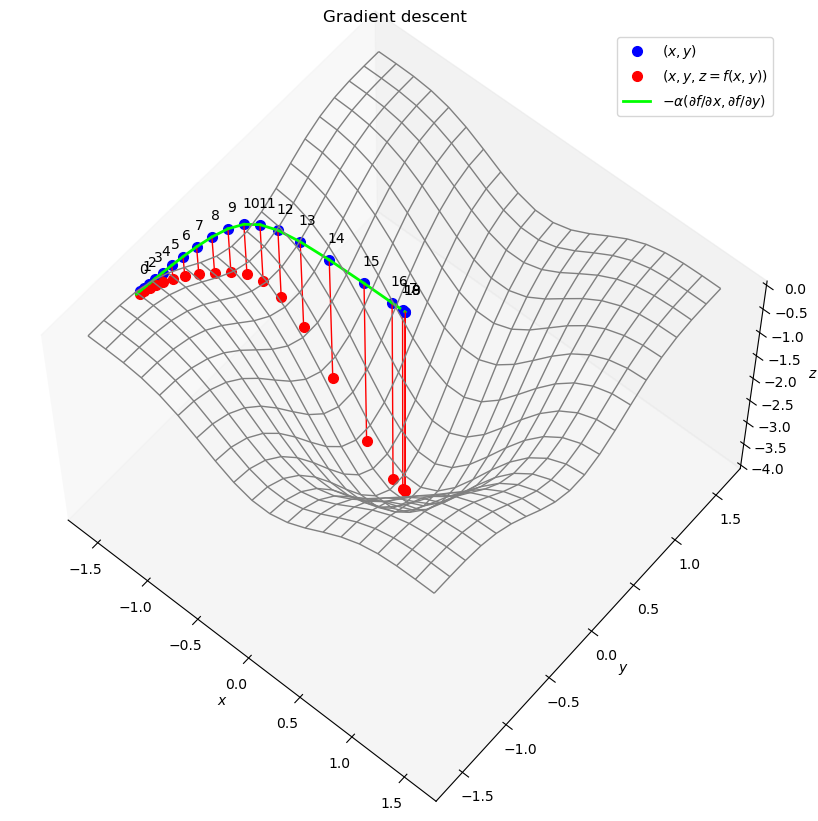

In [26]:
# plot z = f(x, y) over -pi/2 <= x, y <= pi/2
fig = plt.figure(figsize=(10, 10)) # (width, height) in inches
ax  = fig.add_subplot(111, projection='3d') # 111 => nrows=1, ncols=1, index=1
ax.plot_wireframe(grid_x, grid_y, grid_z, color='gray', linewidth=1)
ax.grid(False)

# prepare to start gradient descent at (x, y)
x = -.98*limit
y = -.70*limit
print(f'Start at ({x:.2}, {y:.2}).')
old_x = x # save old values for plotting line segments showing steps taken
old_y = y
n_steps = 20
alpha = .1 # step size parameter (library-quality algorithm varies alpha with a line search)

# run gradient descent
for i in range(n_steps):
  df_dx, df_dy = gradient_f(x, y)
  x = x - alpha * df_dx
  y = y - alpha * df_dy

  if True: # this block is not part of the algorithm: it just draws
    print(f'  i={i}, moving ({-alpha * df_dx:.2}, {-alpha * df_dy:.2})')
    z = f(x, y)
    shift = .1
    ax.text(x - shift, y + shift, 0, str(i))
    xy_legend, = ax.plot3D(x, y, 0, 'ob', markersize=7, label=f'$(x, y)$') # blue circle in 2D z=0 plane
    xyz_legend, = ax.plot3D(x, y, z, 'or', markersize=7, label=f'$(x, y, z=f(x, y))$') # red circle in 3D
    label = r'$-\alpha (\partial f / \partial x, \partial f / \partial y)$'
    gradient_legend, = ax.plot3D([x, old_x], [y, old_y], 0, '-', color='lime', linewidth=2, label=label)
    ax.plot3D([x, x], [y, y], [0, z], '-r', linewidth=1)
    old_x = x
    old_y = y
    
print(f'End at ({x:.2}, {y:.2}).')

ax.view_init(elev=60, azim=-50)
plt.title('Gradient descent')
plt.xlabel(f'$x$')
plt.ylabel(f'$y$')
ax.set_zlabel(f'$z$')
# If I call plt.legend(), I get as many points in the legend as I plotted, 2*n_steps,
# plus n_steps lines. I saved some "handle" (?) from each ax.plot() call, overwriting
# it until the last loop iteration. I use those final handles to make a legend
# with only three items:
plt.legend(handles=[xy_legend, xyz_legend, gradient_legend])
plt.savefig(fname='gradientDescent.png')


### Convert the code above into a function

In [8]:
def gradient_descent(x_vector, gradient, alpha=.1, epsilon=.01, n=30, verbose=False):
    for i in np.arange(n):
        gr = gradient(x_vector)
        x_vector = x_vector - alpha * gr
        gr_size = np.sum(np.abs(gr))
        if verbose:
            with np.printoptions(precision=3): # set precision for this block only
                # I use np.array([...]) below to ensure that np.printoptions() applies.
                print(f'i={i}, x_vector={np.array([x_vector])}, gr={np.array([gr])},' +
                      f'gr_size={np.array([gr_size])}, moving {np.array([-alpha*gr])}')
        if (gr_size < epsilon):
            break
    return x_vector

### Test gradient_descent() on a familiar 1D function, $f(x) = x^2$

In [28]:
def f(x):
    return x**2

def g(x): # gradient
    return 2*x

# Use x=-2 as the starting point for gradient descent to find the minimum.
gradient_descent(x_vector=np.array(-2), gradient=g, alpha=.75, verbose=True)
# Also try alpha=1 (cycle), alpha=1/4 (converges without alternating sign),
# alpha=1.1 (diverges).


i=0, x_vector=[1.], gr=[-4],gr_size=[4], moving [3.]
i=1, x_vector=[-0.5], gr=[2.],gr_size=[2.], moving [-1.5]
i=2, x_vector=[0.25], gr=[-1.],gr_size=[1.], moving [0.75]
i=3, x_vector=[-0.125], gr=[0.5],gr_size=[0.5], moving [-0.375]
i=4, x_vector=[0.062], gr=[-0.25],gr_size=[0.25], moving [0.188]
i=5, x_vector=[-0.031], gr=[0.125],gr_size=[0.125], moving [-0.094]
i=6, x_vector=[0.016], gr=[-0.062],gr_size=[0.062], moving [0.047]
i=7, x_vector=[-0.008], gr=[0.031],gr_size=[0.031], moving [-0.023]
i=8, x_vector=[0.004], gr=[-0.016],gr_size=[0.016], moving [0.012]
i=9, x_vector=[-0.002], gr=[0.008],gr_size=[0.008], moving [-0.006]


-0.001953125

### Test gradient_descent() on the 2D function from the lecture notes

In [30]:
def f(x_vector): # function
    x = x_vector[0]
    y = x_vector[1]
    return x**2 + y**2 - 6*x - 4*y + 13

def g(x_vector): # gradient
    x = x_vector[0]
    y = x_vector[1]
    return np.array([2*x - 6, 2*y - 4])

gradient_descent(x_vector=np.array([0, 0]), gradient=g, alpha=0.4, verbose=True)

i=0, x_vector=[[2.4 1.6]], gr=[[-6 -4]],gr_size=[10], moving [[2.4 1.6]]
i=1, x_vector=[[2.88 1.92]], gr=[[-1.2 -0.8]],gr_size=[2.], moving [[0.48 0.32]]
i=2, x_vector=[[2.976 1.984]], gr=[[-0.24 -0.16]],gr_size=[0.4], moving [[0.096 0.064]]
i=3, x_vector=[[2.995 1.997]], gr=[[-0.048 -0.032]],gr_size=[0.08], moving [[0.019 0.013]]
i=4, x_vector=[[2.999 1.999]], gr=[[-0.01  -0.006]],gr_size=[0.016], moving [[0.004 0.003]]
i=5, x_vector=[[3. 2.]], gr=[[-0.002 -0.001]],gr_size=[0.003], moving [[0.001 0.001]]


array([2.999808, 1.999872])

### Confirm that stochastic gradient descent (SGD) can help with speed

In [32]:
from sklearn.datasets import make_classification, make_regression
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier, SGDRegressor
import time

n = 1000000
X, y = make_classification(n_samples=n, n_features=10, n_redundant=3, n_informative=7,
                           random_state=0, n_clusters_per_class=1)
clfs = [linear_model.LogisticRegression(), SGDClassifier(loss='log_loss')]
for clf in clfs:
    start = time.time()
    clf.fit(X, y)
    end = time.time()
    print(f'clf={clf}, time={end - start:.3}')
X, y = make_regression(n_samples=n, n_features=10, noise=2, random_state=0)
models = [linear_model.LinearRegression(), SGDRegressor(loss='squared_error', penalty=None)]
for model in models:
    start = time.time()
    model.fit(X, y)
    end = time.time()
    print(f'model={model}, time={end - start:.3}')


clf=LogisticRegression(), time=2.88
clf=SGDClassifier(loss='log_loss'), time=5.67
model=LinearRegression(), time=0.61
model=SGDRegressor(penalty=None), time=4.08


Well, SGD slowed things down! This requires further investigation.